In [89]:
# GOAL: HAVE EACH ANALYSIS SECTION COMPUTE A STANDARD SET OF CALCULATIONS FOR RISK METRICS AND CORRELATION

"""
For now, we keep it simple. If we need to expand, we can. 
We are taking what we need to in order to understand how each basket of currencies 
is correlated to the market proxy (bitcoin)
"""

'\nFor now, we keep it simple. If we need to expand, we can. \nWe are taking what we need to in order to understand how each basket of currencies \nis correlated to the market proxy (bitcoin)\n'

In [90]:
# STEP 1: IMPORT DEPENDENCIES
#For basic calculations:
import pandas as pd
import numpy as np
import csv
from pathlib import Path
import hvplot.pandas

#For Heatmap:
import seaborn as sns
%matplotlib inline

In [91]:
# STEP 2: IMPORT DATA AS DATAFRAME
"""
Determnine if we are reading csv data, running individual api calls, or querying an in-house database
"""
#reading in csv data
df_2018 = pd.read_csv(
    Path('2018_data.csv')
).set_index('Month')

In [92]:
# View the dataframe
df_2018.describe()

,price_open,price_close,volume_traded,price_open.1,price_close.1,volume_traded.1,price_open.2,price_close.2,volume_traded.2,price_open.3,...,volume_traded.5,price_open.6,price_close.6,volume_traded.6,price_open.7,price_close.7,volume_traded.7,price_open.8,price_close.8,volume_traded.8
count,12.000000,12.000000,12.000000,12.00000,12.000000,1.200000e+01,12.0000,12.000000,1.200000e+01,12.000000,...,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01
mean,8003.775000,7146.175000,197638.688179,503.97000,452.714167,2.191600e+06,111.7625,95.025833,5.757668e+05,0.997392,...,3.349103e+08,234.675833,199.300000,69306.733373,371.898500,292.644750,50265.102545,0.041148,0.019545,2.949424e+07
std,2578.202017,2072.802689,100047.827686,295.99537,303.593291,1.278655e+06,62.8595,54.611350,3.428206e+05,0.008791,...,1.972352e+08,125.287163,108.777121,32372.876610,274.150662,193.198831,24559.342212,0.087040,0.031242,5.627548e+07
min,3969.400000,3691.900000,80038.919050,111.81000,111.640000,1.095661e+06,31.6200,29.770000,2.451401e+05,0.984200,...,1.162611e+08,80.250000,55.020000,27875.666940,90.703000,77.073000,21546.518090,0.000000,0.000000,0.000000e+00
25%,6549.600000,6367.800000,123154.472875,269.18250,223.190000,1.436023e+06,61.8100,58.075000,3.182792e+05,0.995400,...,1.959945e+08,145.017500,126.192500,48864.819033,192.925500,177.782250,35547.098832,0.000000,0.000000,0.000000e+00
50%,7252.850000,6963.450000,148693.689550,442.38000,412.035000,1.723169e+06,98.6050,79.905000,4.968564e+05,0.998350,...,3.170520e+08,196.070000,177.400000,58343.475440,271.854500,228.300000,47269.879660,0.000000,0.000000,0.000000e+00
75%,9461.250000,8105.300000,258272.417250,688.69500,600.547500,2.212861e+06,151.8900,125.730000,7.958817e+05,0.999525,...,3.934784e+08,308.315000,250.675000,89149.688080,500.106250,346.664250,61460.019500,0.046387,0.039125,2.058818e+07
max,13971.100000,10310.000000,364738.920100,1105.30000,1105.300000,5.550937e+06,230.3200,201.840000,1.374386e+06,1.019100,...,7.654455e+08,479.760000,393.930000,142754.996200,1027.191000,689.500000,112577.020200,0.300000,0.085512,1.601121e+08


In [93]:
# Clean the dataframe to only include the closing price
final_2018_df = pd.DataFrame()
final_2018_df['BTC_Monthly_Close'] = df_2018['price_close']
final_2018_df['ETH_Monthly_Close'] = df_2018['price_close.1']
final_2018_df['LTC_Monthly_Close'] = df_2018['price_close.2']
final_2018_df['USDT_Monthly_Close'] = df_2018['price_close.3']
final_2018_df['XLM_Monthly_Close'] = df_2018['price_close.4']
final_2018_df['XRP_Monthly_Close'] = df_2018['price_close.5']
final_2018_df['ZEC_Monthly_Close'] = df_2018['price_close.6']
final_2018_df['DASH_Monthly_Close'] = df_2018['price_close.7']
final_2018_df['ADA_Monthly_Close'] = df_2018['price_close.8']

final_2018_df

,BTC_Monthly_Close,ETH_Monthly_Close,LTC_Monthly_Close,USDT_Monthly_Close,XLM_Monthly_Close,XRP_Monthly_Close,ZEC_Monthly_Close,DASH_Monthly_Close,ADA_Monthly_Close
Month,,,,,,,,,
January,10101.6,1105.30,162.30,0.9850,0.017060,1.12020,393.93,689.500,0.000000
February,10310.0,850.10,201.84,0.9999,0.330001,0.88697,380.30,582.368,0.000000
March,6911.1,392.40,115.84,0.9972,0.203963,0.49841,184.13,303.719,0.000000
April,9243.2,669.57,148.38,1.0002,0.424000,0.83101,284.41,473.475,0.000000
May,7485.6,577.54,118.18,0.9987,0.296636,0.61108,239.43,304.394,0.000000
June,6387.9,453.05,81.06,0.9987,0.192017,0.46871,170.67,239.024,0.000000
July,7726.0,431.67,78.75,0.9980,0.275147,0.43454,209.23,217.576,0.000000
August,7015.8,281.60,62.16,0.9998,0.223409,0.33500,150.01,195.100,0.000000
September,6604.1,231.96,60.96,0.9964,0.259670,0.57920,129.87,186.310,0.085512


In [94]:
# STEP 3: CALCULATE Monthly RETURNS FOR EACH CURRENCY IN Designated Time range from  DATAFRAME, DROP NULL VALUES
"""

Will need: .pct_change().dropna(inplace = True)

"""
btc_2018_df = final_2018_df['BTC_Monthly_Close'].pct_change().fillna(0)
btc_2018_df

Month
January      0.000000
February     0.020630
March       -0.329670
April        0.337443
May         -0.190151
June        -0.146642
July         0.209474
August      -0.091923
September   -0.058682
October     -0.044911
November    -0.370686
December    -0.069910
Name: BTC_Monthly_Close, dtype: float64

In [95]:
eth_2018_df = final_2018_df['ETH_Monthly_Close'].pct_change().fillna(0)
eth_2018_df

Month
January      0.000000
February    -0.230888
March       -0.538407
April        0.706346
May         -0.137446
June        -0.215552
July        -0.047191
August      -0.347650
September   -0.176278
October     -0.151233
November    -0.432954
December     0.172161
Name: ETH_Monthly_Close, dtype: float64

In [96]:
ltc_2018_df = final_2018_df['LTC_Monthly_Close'].pct_change().fillna(0)
ltc_2018_df

Month
January      0.000000
February     0.243623
March       -0.426080
April        0.280905
May         -0.203531
June        -0.314097
July        -0.028497
August      -0.210667
September   -0.019305
October     -0.189304
November    -0.359571
December    -0.059400
Name: LTC_Monthly_Close, dtype: float64

In [97]:
usdt_2018_df = final_2018_df['USDT_Monthly_Close'].pct_change().fillna(0)
usdt_2018_df

Month
January      0.000000
February     0.015127
March       -0.002700
April        0.003008
May         -0.001500
June         0.000000
July        -0.000701
August       0.001804
September   -0.003401
October     -0.004516
November    -0.007561
December     0.014933
Name: USDT_Monthly_Close, dtype: float64

In [98]:
xlm_2018_df = final_2018_df['XLM_Monthly_Close'].pct_change().fillna(0)
xlm_2018_df

Month
January       0.000000
February     18.343552
March        -0.381932
April         1.078808
May          -0.300387
June         -0.352685
July          0.432930
August       -0.188038
September     0.162308
October      -0.133947
November     -0.303066
December     -0.302504
Name: XLM_Monthly_Close, dtype: float64

In [99]:
xrp_2018_df = final_2018_df['XRP_Monthly_Close'].pct_change().fillna(0)
xrp_2018_df

Month
January      0.000000
February    -0.208204
March       -0.438076
April        0.667322
May         -0.264654
June        -0.232981
July        -0.072902
August      -0.229070
September    0.728955
October     -0.223066
November    -0.202911
December    -0.030221
Name: XRP_Monthly_Close, dtype: float64

In [100]:
zec_2018_df = final_2018_df['ZEC_Monthly_Close'].pct_change().fillna(0)
zec_2018_df

Month
January      0.000000
February    -0.034600
March       -0.515830
April        0.544615
May         -0.158152
June        -0.287182
July         0.225933
August      -0.283038
September   -0.134258
October     -0.113267
November    -0.310177
December    -0.307402
Name: ZEC_Monthly_Close, dtype: float64

In [101]:
dash_2018_df = final_2018_df['DASH_Monthly_Close'].pct_change().fillna(0)
dash_2018_df

Month
January      0.000000
February    -0.155376
March       -0.478476
April        0.558925
May         -0.357106
June        -0.214755
July        -0.089732
August      -0.103302
September   -0.045054
October     -0.183087
November    -0.402105
December    -0.153035
Name: DASH_Monthly_Close, dtype: float64

In [102]:
ada_2018_df = final_2018_df['ADA_Monthly_Close'].drop(
    labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']).pct_change().fillna(0)
ada_2018_df

Month
September    0.000000
October     -0.184547
November    -0.446444
December     0.054404
Name: ADA_Monthly_Close, dtype: float64

In [103]:
monthly_returns_2018 = pd.DataFrame()
monthly_returns_2018['BTC'] = btc_2018_df
monthly_returns_2018['ETH'] = eth_2018_df
monthly_returns_2018['LTC'] = ltc_2018_df
monthly_returns_2018['USDT'] = usdt_2018_df
monthly_returns_2018['XLM'] = xlm_2018_df
monthly_returns_2018['XRP'] = xrp_2018_df
monthly_returns_2018['ZEC'] = zec_2018_df
monthly_returns_2018['DASH'] = dash_2018_df
monthly_returns_2018['ADA'] = ada_2018_df
monthly_returns_2018

,BTC,ETH,LTC,USDT,XLM,XRP,ZEC,DASH,ADA
Month,,,,,,,,,
January,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
February,0.020630,-0.230888,0.243623,0.015127,18.343552,-0.208204,-0.034600,-0.155376,NaN
March,-0.329670,-0.538407,-0.426080,-0.002700,-0.381932,-0.438076,-0.515830,-0.478476,NaN
April,0.337443,0.706346,0.280905,0.003008,1.078808,0.667322,0.544615,0.558925,NaN
May,-0.190151,-0.137446,-0.203531,-0.001500,-0.300387,-0.264654,-0.158152,-0.357106,NaN
June,-0.146642,-0.215552,-0.314097,0.000000,-0.352685,-0.232981,-0.287182,-0.214755,NaN
July,0.209474,-0.047191,-0.028497,-0.000701,0.432930,-0.072902,0.225933,-0.089732,NaN
August,-0.091923,-0.347650,-0.210667,0.001804,-0.188038,-0.229070,-0.283038,-0.103302,NaN
September,-0.058682,-0.176278,-0.019305,-0.003401,0.162308,0.728955,-0.134258,-0.045054,0.000000


In [104]:
type(monthly_returns_2018['BTC'])

pandas.core.series.Series

In [105]:
# Step 4: Calculate the variance of bitcoin, in this case being used as a proxy for the market.
# assign to market variance value
market_var = btc_2018_df.var()
market_var

0.03960906449096394

In [106]:
# Calcualte the variance of the remaining crypto currencies.

In [107]:
btc_var_2018 = btc_2018_df.var()
btc_var_2018

0.03960906449096394

In [108]:
eth_var_2018 = eth_2018_df.var()
eth_var_2018

0.10349719596024033

In [109]:
ltc_var_2018 = ltc_2018_df.var()
ltc_var_2018

0.04875514501258864

In [110]:
usdt_var_2018 = usdt_2018_df.var()
usdt_var_2018

4.961654022047864e-05

In [111]:
xlm_var_2018 = xlm_2018_df.var()
xlm_var_2018

28.299571049446936

In [112]:
xrp_var_2018 = xrp_2018_df.var()
xrp_var_2018

0.13314435054374082

In [113]:
zec_var_2018 = zec_2018_df.var()
zec_var_2018

0.07880994075293156

In [114]:
dash_var_2018 = dash_2018_df.var()
dash_var_2018

0.06899686209898444

In [115]:
ada_var_2018 = ada_2018_df.var()
ada_var_2018

0.05107222784251709

In [116]:
# STEP 5B: CALCULATE COVARIANCE OF EACH CURRENCY RELATIVE TO BITCOIN
"""
Use monthly returns of currency and monthly returns of bitcoin as market proxy

"""

# market_cov = final_2018_df['BTC_Monthly_Close'].cov(final_2018_df['BTC_Monthly_Close'])
# market_cov

mkt_2018_cov = btc_2018_df.cov(btc_2018_df)
mkt_2018_cov

0.039609064490963936

In [117]:
eth_2018_cov = eth_2018_df.cov(btc_2018_df)
eth_2018_cov

0.05189034652482842

In [118]:
ltc_2018_cov = ltc_2018_df.cov(btc_2018_df)
ltc_2018_cov

0.03697705602745253

In [119]:
usdt_2018_cov = usdt_2018_df.cov(btc_2018_df)
usdt_2018_cov

0.0004762717938323698

In [120]:
xlm_2018_cov = xlm_2018_df.cov(btc_2018_df)
xlm_2018_cov

0.21100782904329357

In [121]:
xrp_2018_cov = xrp_2018_df.cov(btc_2018_df)
xrp_2018_cov

0.04265196190809219

In [122]:
zec_2018_cov = zec_2018_df.cov(btc_2018_df)
zec_2018_cov

0.05126905251706084

In [123]:
dash_2018_cov = dash_2018_df.cov(btc_2018_df)
dash_2018_cov

0.04585774066938615

In [124]:
ada_2018_cov = ada_2018_df.cov(btc_2018_df)
ada_2018_cov

0.030510765635409158

In [125]:
# STEP 6: CALCULATE BETA OF EACH CURRENCY

"""
beta = covariance of asset to market / variance of market

use previous calculations for market variance and covariance of assets
"""
btc_beta_2018 = mkt_2018_cov / market_var
btc_beta_2018


0.9999999999999998

In [126]:
eth_beta_2018 = eth_2018_cov / btc_var_2018
eth_beta_2018

1.310062411008627

In [127]:
ltc_beta_2018 = ltc_2018_cov / btc_var_2018
ltc_beta_2018

0.9335503502206709

In [128]:
usdt_beta_2018 = usdt_2018_cov / btc_var_2018
usdt_beta_2018

0.012024313120069326

In [129]:
xlm_beta_2018 = xlm_2018_cov / btc_var_2018
xlm_beta_2018

5.327261114471184

In [130]:
xrp_beta_2018 = xrp_2018_cov / btc_var_2018
xrp_beta_2018

1.076823258924038

In [131]:
zec_beta_2018 = zec_2018_cov / btc_var_2018
zec_beta_2018

1.2943767588541988

In [132]:
dash_beta_2018 = dash_2018_cov / btc_var_2018
dash_beta_2018

1.1577587418114288

In [133]:
ada_beta_2018 = ada_2018_cov / btc_var_2018
ada_beta_2018

0.7702975575797709

In [134]:
Beta_list = [btc_beta_2018, eth_beta_2018, ltc_beta_2018, ada_beta_2018, xlm_beta_2018, xrp_beta_2018, zec_beta_2018, usdt_beta_2018, dash_beta_2018]

Beta_list

[0.9999999999999998,
 1.310062411008627,
 0.9335503502206709,
 0.7702975575797709,
 5.327261114471184,
 1.076823258924038,
 1.2943767588541988,
 0.012024313120069326,
 1.1577587418114288]

<AxesSubplot:>

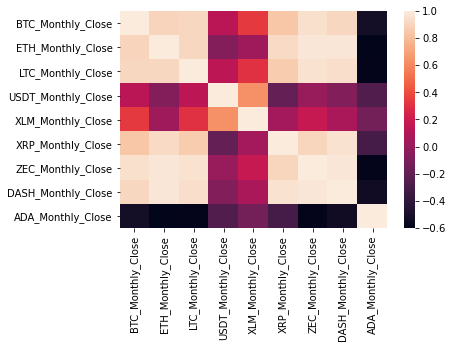

In [135]:
# Display Correlation Heatmap With Seaborn

"""
NEW CELL to check monthly returns are displayed with pct_change already applied
- Take dataframe of daily returns from step 3 (pct_change drop na already applied)

NEW CELL to check correlation dataframe
- correlation = monthly_returns_dataframe.corr()

NEW CELL to display heatmap
- sns.heatmap(correlation)


"""
correlation = final_2018_df.corr()
sns.heatmap(correlation)

In [136]:
correlation.hvplot.heatmap()

:HeatMap   [columns,index]   (value)

In [137]:
monthly_returns_2018.hvplot.box(title = "2020: Spread of Monthly Returns", figsize = (30, 10), rot = 45,  box_fill_color = 'cyan', outlier_color = 'red')

:BoxWhisker   [Variable]   (value)

In [138]:
# lazy way of compiling summary data
summar_data = pd.DataFrame()
summary_data = monthly_returns_2018.describe()

# basically all this is just to flip charts to make input of the beta series more convenient
summary_data = summary_data.T
summary_data['beta'] = Beta_list
summary_data = summary_data.T
summary_data

,BTC,ETH,LTC,USDT,XLM,XRP,ZEC,DASH,ADA
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,4.000000
mean,-0.061252,-0.116591,-0.107160,0.001208,1.504587,-0.042151,-0.114446,-0.135259,-0.144147
std,0.199020,0.321710,0.220806,0.007044,5.319734,0.364890,0.280731,0.262673,0.225992
min,-0.370686,-0.538407,-0.426080,-0.007561,-0.381932,-0.438076,-0.515830,-0.478476,-0.446444
25%,-0.157519,-0.260078,-0.236524,-0.002875,-0.302644,-0.230048,-0.292237,-0.250343,-0.250021
50%,-0.064296,-0.163756,-0.124352,-0.000350,-0.160992,-0.205558,-0.146205,-0.154206,-0.092274
75%,0.005158,-0.035393,-0.014479,0.002105,0.229963,-0.022666,-0.025950,-0.078562,0.013601
max,0.337443,0.706346,0.280905,0.015127,18.343552,0.728955,0.544615,0.558925,0.054404
beta,1.000000,1.310062,0.933550,0.770298,5.327261,1.076823,1.294377,0.012024,1.157759


In [139]:
mean_series = summary_data.loc['mean'].sort_values()
mean_series.hvplot.bar(rot = 45, title = "2018 Bar: Average Monthly Returns by Percentage", fill_color = 'cyan', hover_color = 'black', xlabel = 'Cryptocurrencies', ylabel = 'percentage change')

:Bars   [index]   (mean)

In [140]:
mean_series = summary_data.loc['mean'].sort_values()
mean_series.hvplot.heatmap(title = "2018 Heatmap: Average Monthly Returns by Percentage", fill_color = 'cyan', hover_color = 'orange')

:HeatMap   [columns,index]   (value)

In [141]:
# bar chart of standard deviations of top 12 cryptocurrencies
std_dev_series = summary_data.loc['std'].sort_values()
std_dev_series.hvplot.bar(
    rot = 45, 
    title = "2018 Bar: Standard Deviation of Selected Cryptocurrencies", 
    fill_color = 'cyan', hover_color = 'black', 
    xlabel = 'Cryptocurrencies', 
    ylabel = 'Standard Deviation')

:Bars   [index]   (std)

In [142]:
# bar chart of standard deviations of top 12 cryptocurrencies
std_dev_series = summary_data.loc['std'].sort_values()
std_dev_series.hvplot.heatmap(
    title = "2018 Heatmap: Standard Deviation of Selected Cryptocurrencies", 
    fill_color = 'cyan', hover_color = 'orange', ylabel = 'Cryptocurrency')

:HeatMap   [columns,index]   (value)

In [143]:
# making a beta series without btc so it doesn;t mess up the plots
beta_exc_btc = summary_data.iloc[8, 1:].sort_values()
type(beta_exc_btc)

beta_exc_btc.hvplot.bar(
    title = '2018 Bar: Beta relative to Bitcoin', 
    fill_color = 'cyan', hover_color = 'black',
    xlabel = 'Cryptocurrency',
    ylabel = 'Beta Value'
)

:Bars   [index]   (beta)

In [144]:
# making a beta series without btc so it doesn;t mess up the plots
beta_exc_btc = summary_data.iloc[8, 1:].sort_values()
type(beta_exc_btc)

beta_exc_btc.hvplot.heatmap(
    title = "2020 Heatmap: Beta relative to Bitcoin", 
    fill_color = 'cyan', hover_color = 'orange', 
    ylabel = 'Cryptocurrency'
)

:HeatMap   [columns,index]   (value)

In [145]:
# reading in s&p data
#reading in csv data
market_2018 = pd.read_csv(
    Path('S&P_2018_Closing_Monthly.csv'),
)

# display dataframe
market_2018

,Date,Close_Monthly
0,January,2789.80
1,February,2705.16
2,March,2702.77
3,April,2653.63
4,May,2701.49
5,June,2754.35
6,July,2793.64
7,August,2857.82
8,September,2901.50
9,October,2785.46


In [157]:
# calculate market monthly returns for 2020
# sp_market_returns
sp_returns = market_2018['Close_Monthly'].pct_change().dropna()
sp_returns

1    -0.030339
2    -0.000883
3    -0.018181
4     0.018036
5     0.019567
6     0.014265
7     0.022974
8     0.015284
9    -0.039993
10   -0.022341
11   -0.057256
Name: Close_Monthly, dtype: float64

In [161]:
janky_monthly_returns = monthly_returns_2018[1:]
janky_monthly_returns.reset_index(inplace= True)


In [199]:
janky_monthly_returns

,Month,BTC,ETH,LTC,USDT,XLM,XRP,ZEC,DASH,ADA
0,February,0.020630,-0.230888,0.243623,0.015127,18.343552,-0.208204,-0.034600,-0.155376,NaN
1,March,-0.329670,-0.538407,-0.426080,-0.002700,-0.381932,-0.438076,-0.515830,-0.478476,NaN
2,April,0.337443,0.706346,0.280905,0.003008,1.078808,0.667322,0.544615,0.558925,NaN
3,May,-0.190151,-0.137446,-0.203531,-0.001500,-0.300387,-0.264654,-0.158152,-0.357106,NaN
4,June,-0.146642,-0.215552,-0.314097,0.000000,-0.352685,-0.232981,-0.287182,-0.214755,NaN
5,July,0.209474,-0.047191,-0.028497,-0.000701,0.432930,-0.072902,0.225933,-0.089732,NaN
6,August,-0.091923,-0.347650,-0.210667,0.001804,-0.188038,-0.229070,-0.283038,-0.103302,NaN
7,September,-0.058682,-0.176278,-0.019305,-0.003401,0.162308,0.728955,-0.134258,-0.045054,0.000000
8,October,-0.044911,-0.151233,-0.189304,-0.004516,-0.133947,-0.223066,-0.113267,-0.183087,-0.184547
9,November,-0.370686,-0.432954,-0.359571,-0.007561,-0.303066,-0.202911,-0.310177,-0.402105,-0.446444


In [200]:
# EXTRA: Calculate S&P 500 market variance based on 12 month return data (need to find that still)

"""
sp_market_var = apply after pct_change applied for sp closing price monthly data
"""
sp_market_var = sp_returns.var()

# EXTRA: Calculate S&P 500 market covariance based on 12 month return data (need to find that still)

btc_sp_cov = janky_monthly_returns['BTC'].cov(sp_returns)
# # btc_sp_cov = monthly_returns_2018['BTC'].cov(sp_returns)
eth_sp_cov = janky_monthly_returns['ETH'].cov(sp_returns)
ltc_sp_cov = janky_monthly_returns['LTC'].cov(sp_returns)
ada_sp_cov = janky_monthly_returns['ADA'].cov(sp_returns)
xlm_sp_cov = janky_monthly_returns['XLM'].cov(sp_returns)
xrp_sp_cov = janky_monthly_returns['XRP'].cov(sp_returns)
zec_sp_cov = janky_monthly_returns['ZEC'].cov(sp_returns)
usdt_sp_cov = janky_monthly_returns['USDT'].cov(sp_returns)
dash_sp_cov = janky_monthly_returns['DASH'].cov(sp_returns)


# EXTRA: CALCULATE BETA OF EACH CURRENCY Relative to S&P 500
"""
beta = covariance of asset to market / variance of market

use previous calculations for market variance and covariance of assets
"""


btc_sp_beta = btc_sp_cov / sp_market_var
eth_sp_beta = eth_sp_cov / sp_market_var
ltc_sp_beta = ltc_sp_cov / sp_market_var
ada_sp_beta = ada_sp_cov / sp_market_var
xlm_sp_beta = xlm_sp_cov / sp_market_var
xrp_sp_beta = xrp_sp_cov / sp_market_var
zec_sp_beta = zec_sp_cov / sp_market_var
usdt_sp_beta = usdt_sp_cov / sp_market_var
dash_sp_beta = dash_sp_cov / sp_market_var

# # making list of betas 
SP_Beta_list = [btc_sp_beta, eth_sp_beta, ltc_sp_beta, ada_sp_beta, xlm_sp_beta, xrp_sp_beta, zec_sp_beta, usdt_sp_beta, dash_sp_beta]

In [201]:
new_eth_sp_cov


0.0014469363487987874

In [202]:
ltc_sp_cov

0.001801806378221541

In [203]:
ada_sp_cov

0.0034493533198241004

In [204]:
xlm_sp_cov

0.0039400523855246

In [205]:
xrp_sp_cov

0.003344584999703002

In [206]:
zec_sp_cov

0.002756833870309538

In [207]:
usdt_sp_cov

-6.799837787433854e-06

In [208]:
dash_sp_cov

0.002878622805703227

In [209]:
# adding to main dataframe:
summary_data2 = pd.DataFrame()
summary_data2 = summary_data.T
summary_data2['sp_beta'] = SP_Beta_list
final_summary_data = summary_data2.T
final_summary_data

,BTC,ETH,LTC,USDT,XLM,XRP,ZEC,DASH,ADA
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,4.000000
mean,-0.061252,-0.116591,-0.107160,0.001208,1.504587,-0.042151,-0.114446,-0.135259,-0.144147
std,0.199020,0.321710,0.220806,0.007044,5.319734,0.364890,0.280731,0.262673,0.225992
min,-0.370686,-0.538407,-0.426080,-0.007561,-0.381932,-0.438076,-0.515830,-0.478476,-0.446444
25%,-0.157519,-0.260078,-0.236524,-0.002875,-0.302644,-0.230048,-0.292237,-0.250343,-0.250021
50%,-0.064296,-0.163756,-0.124352,-0.000350,-0.160992,-0.205558,-0.146205,-0.154206,-0.092274
75%,0.005158,-0.035393,-0.014479,0.002105,0.229963,-0.022666,-0.025950,-0.078562,0.013601
max,0.337443,0.706346,0.280905,0.015127,18.343552,0.728955,0.544615,0.558925,0.054404
beta,1.000000,1.310062,0.933550,0.770298,5.327261,1.076823,1.294377,0.012024,1.157759
sp_beta,3.737538,1.870362,2.329080,4.458759,5.093054,4.323331,3.563583,-0.008790,3.721012


In [210]:
sp_beta_with_btc = final_summary_data.iloc[9, 0:].sort_values()
sp_beta_with_btc

DASH   -0.008790
ETH     1.870362
LTC     2.329080
ZEC     3.563583
ADA     3.721012
BTC     3.737538
XRP     4.323331
USDT    4.458759
XLM     5.093054
Name: sp_beta, dtype: float64

In [211]:
sp_beta_with_btc.hvplot.bar(
    rot = 70,
    title = '2018 Bar: Beta relative to S&P 500',
    fill_color = 'cyan', 
    hover_color = 'black',
    xlabel = 'Cryptocurrency',
    ylabel = 'Beta Value'

)

:Bars   [index]   (sp_beta)

In [212]:
# making heatmap for s&p beta
sp_beta_with_btc.hvplot.heatmap(
    title = "2018 Heatmap: Beta relative to S&P 500",
    fill_color = 'cyan', 
    hover_color = 'orange', 
    ylabel = 'Cryptocurrency'

)

:HeatMap   [columns,index]   (value)